In [1]:
from netCDF4 import Dataset
import numpy as np
from tqdm import tqdm
import pandas as pd

def get_var(var):
    if var in ["surflw", "surfsw"]:
        return "alb"
    return var

def get_concat_axis(var):
    if var in ["surflw", "surfsw", "tstar"]:
        return 2
    return 1

date = "20110610T00"
data_shape = (70, 1500, 48)
levels_range = range(1, 49)
input_vars_m = ["tstar", "stoa", "szen", "surflw", "surfsw"]
input_vars_mn = ["p", "t", "q", "co2", "o3", "n2o", "ch4", "o2", "cfc12", "hfc134a"]
input_vars_mn1 = ["pl", "tl"]
all_input_vars = input_vars_m + input_vars_mn + input_vars_mn1
input_dataset = {}
out_config = ["ga7", "300", "260"]
out_wl = ["lw", "sw"]
output_vars = ["dflx", "uflx", "nflx", "hrts"]
output_dataset = {}

out_size = data_shape[1] * data_shape[2]
for var in tqdm(input_vars_mn + input_vars_mn1):
    arr_list = map(lambda nr: Dataset("{0}_cs_part_{1}.{2}".format(date, nr, var)).variables[var][:], levels_range)
    arr_flatten = np.concatenate(arr_list, axis=2).flatten()
    shape0 = arr_flatten.shape[0] / out_size
    for out_lev in range(shape0):
        out_key = "_".join([var, str(out_lev)])
        input_dataset[out_key] = arr_flatten[out_size * out_lev:out_size * (out_lev + 1)]
    
for var in tqdm(input_vars_m):
    arr_list = map(lambda nr: Dataset("{0}_cs_part_{1}.{2}".format(date, nr, var)).variables[get_var(var)][:], levels_range)
    input_dataset[var] = np.concatenate(arr_list, axis=get_concat_axis(var)).flatten()
    

for wl in out_wl:
    for conf in out_config:
        for var in output_vars:
            try:
                arr_list = map(
                    lambda nr: Dataset("{0}_cs_part_{1}_{2}_{3}.{4}".format(date, nr, wl, conf, var)).variables[var][:], levels_range)
                arr_flatten = np.concatenate(arr_list, axis=2).flatten()
                shape0 = arr_flatten.shape[0] / out_size
                for out_lev in range(shape0):
                    out_key = "_".join([wl, conf, var, str(out_lev)])
                    output_dataset[out_key] = arr_flatten[out_size * out_lev:out_size * (out_lev + 1)]
            except IOError:
                print "no all files for: {0}, {1}, {2}".format(wl, conf, var)
                

    


        
        
        
        

100%|██████████| 5/5 [00:00<00:00, 30.63it/s]


no all files for: lw, 260, dflx
no all files for: lw, 260, uflx
no all files for: lw, 260, nflx
no all files for: lw, 260, hrts


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in greater


no all files for: sw, 300, dflx
no all files for: sw, 300, uflx
no all files for: sw, 300, nflx
no all files for: sw, 300, hrts


In [2]:
def validate(input_dataset, output_dataset):
    ok = True
    for k, v in input_dataset.items():
        if not len(v) == out_size:
            print "ERROR, {0} field has wrong size: {1}".format(k, len(v))
            ok = False
        
    for k, v in output_dataset.items():
        if not len(v) == out_size:
            print "ERROR, {0} field has wrong size: {1}".format(k, len(v))
            ok = False
    return ok

In [3]:

def create_dataframe(input_dataset, output_dataset, write=False, out_lev="all"):
    data = {}
    seq = {}
    seq["lat"] = reduce(lambda x, y: x + y, map(lambda x: [x] * data_shape[2], range(data_shape[1])))
    seq["nr"] = range(data_shape[2]) * data_shape[1]
    input_dataset.update(seq)
    data.update(input_dataset)
    data.update(output_dataset)
    if validate(input_dataset, output_dataset):
        df = pd.DataFrame.from_dict(data)
        if write:
            df.to_csv("{0}_all_metof.csv".format(date), sep='\t', encoding='utf-8')
        return df
    return False
    
            

In [4]:
df = create_dataframe(input_dataset, output_dataset)

In [5]:
df

,cfc12_0,cfc12_1,cfc12_10,cfc12_11,cfc12_12,cfc12_13,cfc12_14,cfc12_15,cfc12_16,cfc12_17,...,tl_65,tl_66,tl_67,tl_68,tl_69,tl_7,tl_70,tl_8,tl_9,tstar
0,2.068363e-09,2.068363e-09,2.068363e-09,2.068363e-09,2.068363e-09,2.068363e-09,2.068363e-09,2.068363e-09,2.068363e-09,2.068363e-09,...,246.204926,242.758957,241.692322,241.621078,241.911591,239.672913,242.131134,223.889450,213.840881,238.750
1,9.608633e-10,9.608633e-10,9.608633e-10,9.608633e-10,9.608633e-10,9.608633e-10,9.608633e-10,9.608633e-10,9.608633e-10,9.608633e-10,...,258.793884,259.296692,259.729553,260.141907,260.513275,235.285828,260.678772,227.019913,220.805832,260.375
2,2.525779e-09,2.525779e-09,2.525779e-09,2.525779e-09,2.525779e-09,2.525779e-09,2.525779e-09,2.525779e-09,2.525779e-09,2.525779e-09,...,279.091125,279.869507,280.524292,281.059937,281.490723,236.285980,281.682495,226.748230,220.167374,285.125
3,4.025013e-09,4.025013e-09,4.025013e-09,4.025013e-09,4.025013e-09,4.025013e-09,4.025013e-09,4.025013e-09,4.025013e-09,4.025013e-09,...,284.112213,284.890533,285.541748,286.067749,286.474823,239.545212,286.649811,228.478226,217.798782,287.875
4,7.442856e-10,7.442856e-10,7.442856e-10,7.442856e-10,7.442856e-10,7.442856e-10,7.442856e-10,7.442856e-10,7.442856e-10,7.442856e-10,...,289.553833,290.336853,290.992310,291.522461,291.933044,244.772705,292.109406,238.672623,233.849121,294.750
5,5.378169e-11,5.378169e-11,5.378169e-11,5.378169e-11,5.378169e-11,5.378169e-11,5.378169e-11,5.378169e-11,5.378169e-11,5.378169e-11,...,288.296692,289.071411,289.720520,290.246094,290.655823,243.785141,290.833191,233.815186,229.031036,292.250
6,2.778194e-09,2.778194e-09,2.778194e-09,2.778194e-09,2.778194e-09,2.778194e-09,2.778194e-09,2.778194e-09,2.778194e-09,2.778194e-09,...,287.860321,288.634705,289.284454,289.811493,290.222351,247.180832,290.399933,236.495193,230.532486,293.125
7,3.168283e-09,3.168283e-09,3.168283e-09,3.168283e-09,3.168283e-09,3.168283e-09,3.168283e-09,3.168283e-09,3.168283e-09,3.168283e-09,...,278.091675,278.159302,278.470123,278.866516,279.245514,244.855881,279.424316,234.781036,230.063782,283.250
8,4.309411e-09,4.309411e-09,4.309411e-09,4.309411e-09,4.309411e-09,4.309411e-09,4.309411e-09,4.309411e-09,4.309411e-09,4.309411e-09,...,290.921906,290.946899,290.843750,290.633850,290.328125,254.688354,290.160248,247.452759,238.209854,288.375
9,4.139555e-10,4.139555e-10,4.139555e-10,4.139555e-10,4.139555e-10,4.139555e-10,4.139555e-10,4.139555e-10,4.139555e-10,4.139555e-10,...,294.652313,295.416565,296.058441,296.576447,296.972504,252.041336,297.140564,241.907455,231.236206,298.125


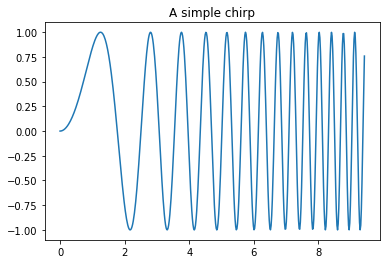

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))
plt.title('A simple chirp');

In [7]:
output_dataset.keys()

['sw_260_nflx_39',
 'sw_260_hrts_36',
 'lw_300_nflx_70',
 'sw_260_uflx_1',
 'sw_260_hrts_41',
 'sw_260_hrts_44',
 'sw_ga7_nflx_30',
 'sw_ga7_hrts_12',
 'sw_260_hrts_17',
 'sw_260_uflx_3',
 'sw_260_uflx_2',
 'lw_300_dflx_70',
 'sw_260_uflx_0',
 'lw_ga7_hrts_68',
 'lw_ga7_hrts_69',
 'sw_260_uflx_5',
 'sw_260_uflx_4',
 'lw_ga7_hrts_64',
 'lw_ga7_hrts_65',
 'lw_ga7_hrts_66',
 'lw_ga7_hrts_67',
 'lw_ga7_hrts_60',
 'lw_ga7_hrts_61',
 'lw_ga7_hrts_62',
 'lw_ga7_hrts_63',
 'lw_ga7_nflx_8',
 'lw_ga7_nflx_9',
 'sw_260_hrts_45',
 'sw_ga7_hrts_58',
 'sw_260_nflx_19',
 'lw_ga7_nflx_0',
 'lw_ga7_nflx_1',
 'lw_ga7_nflx_2',
 'lw_ga7_nflx_3',
 'lw_ga7_nflx_4',
 'lw_ga7_nflx_5',
 'lw_ga7_nflx_6',
 'lw_ga7_nflx_7',
 'sw_ga7_uflx_62',
 'sw_260_uflx_7',
 'sw_ga7_hrts_0',
 'sw_260_nflx_46',
 'sw_260_nflx_45',
 'sw_ga7_hrts_59',
 'sw_260_nflx_43',
 'sw_260_nflx_42',
 'sw_260_nflx_41',
 'sw_260_nflx_40',
 'sw_260_uflx_61',
 'sw_260_nflx_49',
 'sw_260_nflx_48',
 'sw_260_hrts_25',
 'sw_260_hrts_2',
 'sw_260_ufl

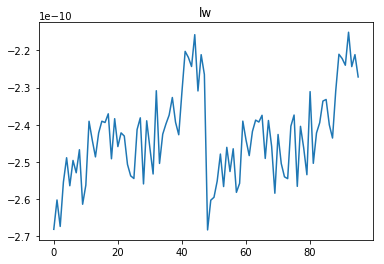

In [7]:
df.shape
output_dataset.keys()
plt.plot(df['lw_300_dflx_0'][:96])
plt.title("lw");


In [9]:
filter(lambda x: x.endswith("_0"), input_dataset.keys())

['tl_0',
 'hfc134a_0',
 'p_0',
 'o2_0',
 'o3_0',
 'pl_0',
 'cfc12_0',
 'n2o_0',
 'co2_0',
 't_0',
 'ch4_0',
 'q_0']

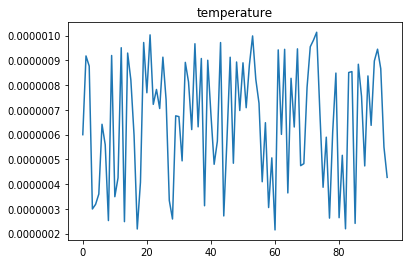

In [10]:
plt.plot(df['ch4_0'][:96])
plt.title("temperature");

In [8]:
nanlist = []
for col in list(df):
    if any(np.isnan(df[col])):
        nanlist.append(col)

In [9]:
good_outputs = set(output_dataset.keys()) - set(nanlist)

In [10]:
from collections import Counter
bad_inputs = set(nanlist) & set(input_dataset.keys())
bad_inputs

{'surfsw'}

In [11]:
Counter(np.isnan(df['surfsw']))
values = {'surfsw': np.mean(df['surfsw'])}
df = df.fillna(value=values)

In [12]:
len(good_outputs)

568

In [35]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from time import time

scores = {}
outputs_list = sorted(filter(lambda x: x.startswith('lw_300_nflx'), list(good_outputs)), 
                      key=lambda x: int(x.split("_")[-1]), reverse=True)
clfs = []
for out in outputs_list[1:3]:
    print("processing for output {0}".format(out))
    X = df[input_dataset.keys()]
    y = df[out]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42)

    print("Fitting the regressor to the training set")
    t0 = time()
    param_grid = {'max_depth': [5, 10, 15],
              'n_estimators': [20, 40, 60], }
    #clf = GridSearchCV(RandomForestRegressor(), param_grid)
    clf = RandomForestRegressor(max_depth=10, n_estimators=20)
    clf = clf.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    #print("Best estimator found by grid search:")
    #print(clf.best_estimator_)
    
    print("Predicting on the test set")
    t0 = time()
    y_pred = clf.predict(X_test)
    print("done in %0.3fs" % (time() - t0))

    scores[out] = r2_score(y_test, y_pred)
    print("r2 score for {0}: {1}".format(out, scores[out]))
    clfs.append(clf)


processing for output lw_300_nflx_69
Fitting the regressor to the training set
done in 391.031s
Predicting on the test set
done in 0.104s
r2 score for lw_300_nflx_69: 0.949302953259
processing for output lw_300_nflx_68
Fitting the regressor to the training set
done in 399.569s
Predicting on the test set
done in 0.112s
r2 score for lw_300_nflx_68: 0.94242822552


In [68]:
print("Predicting on the test set")
t0 = time()
y_pred = clf.predict(X_test)
print("done in %0.3fs" % (time() - t0))

scores[out] = r2_score(y_test, y_pred)
print("r2 score for {0}: {1}".format(out, scores[out]))



Predicting on the test set
done in 0.124s
r2 score for lw_300_nflx_70: 0.936155772492


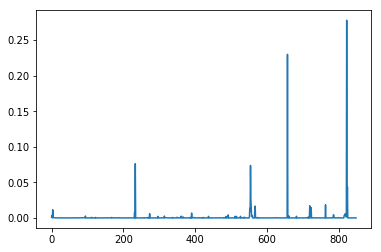

In [38]:
plt.plot(clfs[1].feature_importances_)

In [39]:
good_features = filter(lambda (i, x): x > 0.01, enumerate(list(clfs[1].feature_importances_)))
good_features
feature_names = X_train.columns[map(lambda (i, x): i, good_features)]
feature_rank = zip(feature_names, map(lambda (i, x): x, good_features))
feature_rank

[('tl_0', 0.011495360461297798),
 ('stoa', 0.07620361197443777),
 ('q_57', 0.01341778591482735),
 ('q_56', 0.010209176604877575),
 ('q_55', 0.07367426491339826),
 ('q_54', 0.026451422371814064),
 ('q_53', 0.012507033895128038),
 ('q_59', 0.010367167044470476),
 ('q_58', 0.016660805377104786),
 ('tstar', 0.2298879041589333),
 ('t_8', 0.017074140297977738),
 ('t_0', 0.01446111442889395),
 ('szen', 0.01847451079542365),
 ('q_65', 0.27783522728241755),
 ('q_69', 0.043794290276478805)]

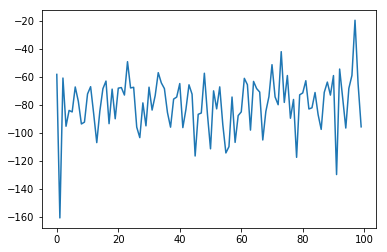

In [32]:
plt.plot(list(y_pred)[:100])

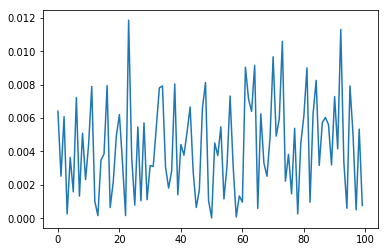

In [34]:
plt.plot(list(X_test['q_53'])[:100])

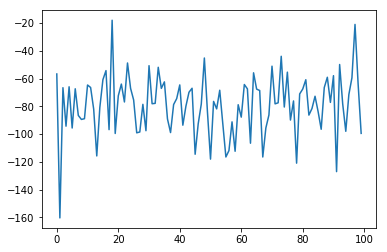

In [14]:
plt.plot(list(y_test)[1000:1100])

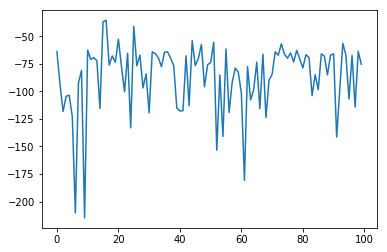

In [17]:
plt.plot(list(y_pred)[1000:1100])

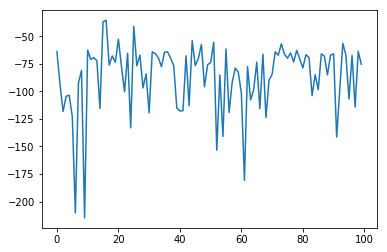

In [16]:
plt.plot(list(y_pred)[1000:1100])

In [75]:

outputs_list

['lw_300_nflx_70',
 'lw_300_nflx_69',
 'lw_300_nflx_68',
 'lw_300_nflx_67',
 'lw_300_nflx_66',
 'lw_300_nflx_65',
 'lw_300_nflx_64',
 'lw_300_nflx_63',
 'lw_300_nflx_62',
 'lw_300_nflx_61',
 'lw_300_nflx_60',
 'lw_300_nflx_59',
 'lw_300_nflx_58',
 'lw_300_nflx_57',
 'lw_300_nflx_56',
 'lw_300_nflx_55',
 'lw_300_nflx_54',
 'lw_300_nflx_53',
 'lw_300_nflx_52',
 'lw_300_nflx_51',
 'lw_300_nflx_50',
 'lw_300_nflx_49',
 'lw_300_nflx_48',
 'lw_300_nflx_47',
 'lw_300_nflx_46',
 'lw_300_nflx_45',
 'lw_300_nflx_44',
 'lw_300_nflx_43',
 'lw_300_nflx_42',
 'lw_300_nflx_41',
 'lw_300_nflx_40',
 'lw_300_nflx_39',
 'lw_300_nflx_38',
 'lw_300_nflx_37',
 'lw_300_nflx_36',
 'lw_300_nflx_35',
 'lw_300_nflx_34',
 'lw_300_nflx_33',
 'lw_300_nflx_32',
 'lw_300_nflx_31',
 'lw_300_nflx_30',
 'lw_300_nflx_29',
 'lw_300_nflx_28',
 'lw_300_nflx_27',
 'lw_300_nflx_26',
 'lw_300_nflx_25',
 'lw_300_nflx_24',
 'lw_300_nflx_23',
 'lw_300_nflx_22',
 'lw_300_nflx_21',
 'lw_300_nflx_20',
 'lw_300_nflx_19',
 'lw_300_nfl